In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
SRC_PATH = PROJECT_ROOT / "src"
sys.path.append(str(SRC_PATH))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from cycle_tda.io import load_csv
from cycle_tda.embeddings import delay_embedding
from cycle_tda.ph import compute_diagrams
from cycle_tda.scoring import cycle_strength_from_diagrams
from cycle_tda.utils import white_noise_like


In [3]:
df_xau = load_csv(
    PROJECT_ROOT / "data/raw/XAU_Monthly.csv",
    date_col="Date",
    value_col="Close"
)

df_xau = df_xau.set_index("Date")
df_xau.head()


,Close
Date,
1793-03-31,19.39
1793-06-30,19.39
1793-09-30,19.39
1793-12-31,19.39
1794-03-31,19.39


In [4]:
y = np.log(df_xau["Close"].values)


In [5]:
m = 12
tau = 3

m, tau


(12, 3)

In [6]:
X = delay_embedding(y, m=m, tau=tau)
X.shape


(1363, 12)

In [7]:
dgms_xau = compute_diagrams(X, maxdim=1)
xau_strength = cycle_strength_from_diagrams(dgms_xau)

xau_strength


0.4451292157173157

In [8]:
y_noise = white_noise_like(y, seed=42)
X_noise = delay_embedding(y_noise, m=m, tau=tau)

dgms_noise = compute_diagrams(X_noise, maxdim=1)
noise_strength = cycle_strength_from_diagrams(dgms_noise)

noise_strength


1.3344273567199707

In [9]:
print("XAU H₁ persistence:", xau_strength)
print("Noise H₁ persistence:", noise_strength)
print("Signal / Noise ratio:", xau_strength / noise_strength if noise_strength > 0 else np.inf)


XAU H₁ persistence: 0.4451292157173157
Noise H₁ persistence: 1.3344273567199707
Signal / Noise ratio: 0.3335732091190378


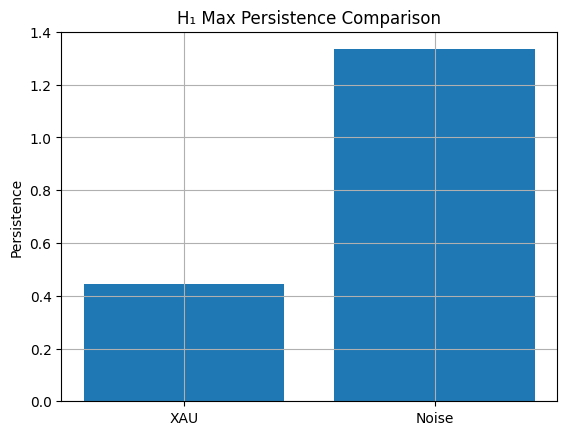

In [10]:
plt.bar(["XAU", "Noise"], [xau_strength, noise_strength])
plt.title("H₁ Max Persistence Comparison")
plt.ylabel("Persistence")
plt.grid(True)
plt.show()
